## **TASK-2.Prediction using Unsupervised ML**

**import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [22]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Converting into DataFrame**

In [39]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['target']=iris.target

In [41]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### **Using Elbow Method to determine k**

In [9]:
# finding number of clusters
x=iris_df.iloc[:,[0,1,2,3]]

# importing kmeans
from sklearn.cluster import KMeans
sse=[]

for i in range(1,15):
  kmean=KMeans(n_clusters=i)
  kmean.fit(x)
  sse.append(kmean.inertia_)

Text(0.5, 1.0, 'Elbow Curve')

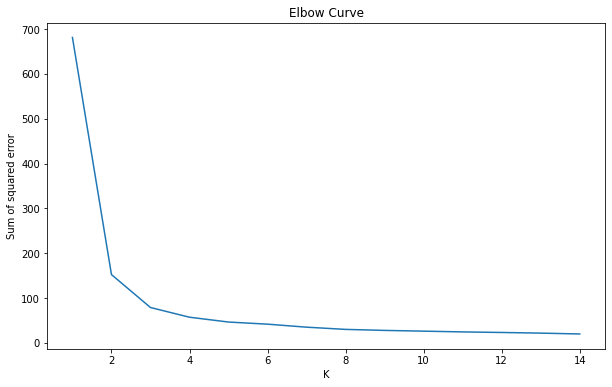

In [11]:
# Plotting the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1,15),sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Curve')

**Therefore we can clearly see that after k=3, the error decrease become almost constant.**
**So, we choose number of clusters=3**

In [13]:
# Applying algorithm to iris dataset

kmean=KMeans(n_clusters=3)
y_kmean=kmean.fit_predict(x)

#### **Clusters predicted by model**

In [24]:
y_kmean

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

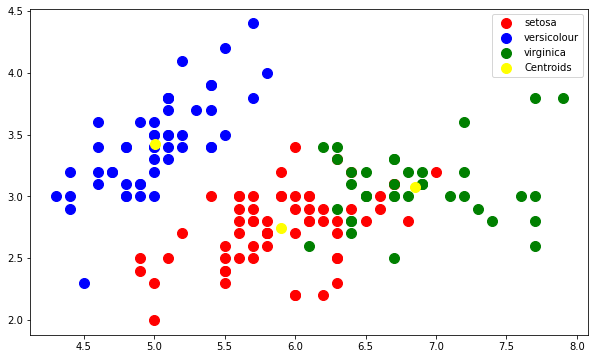

In [37]:
# Visualisation of clusters
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmean == 0, 0], x[y_kmean == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(x[y_kmean == 1, 0], x[y_kmean == 1, 1], s = 100, c = 'blue', label = 'versicolour')
plt.scatter(x[y_kmean == 2, 0], x[y_kmean == 2, 1],s = 100, c = 'green', label = 'virginica')

# Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()